In [3]:
# !pip install -q seaborn wordcloud
#!pip install wordcloud
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline

sns.set_style('whitegrid')
print('Libraries imported')

Libraries imported


In [6]:
import os
# Try common paths (Colab upload or same folder)
possible_paths = [
    '/content/student_feedback.csv',  # Colab default upload path
    '/mnt/data/extracted_feedback/student_feedback.csv',  # from this environment
    './student_feedback.csv',
    '/mnt/data/student_feedback.csv',
     '/content/student_feedback.csv',
    '/mnt/data/extracted_feedback/student_feedback.csv',
    './student_feedback.csv',
    '/mnt/data/student_feedback.csv',
    'c:/Users/vibha/Downloads/student_feedback.csv'  
]

csv_path = csv_path = "C:\\Users\\USER\\OneDrive\\Desktop\\intern\\student_feedback.csv"
for p in possible_paths:
    if os.path.exists(p):
        csv_path = p
        break

if csv_path is None:
    raise FileNotFoundError('C:\\Users\\USER\\OneDrive\\Desktop\\intern\\student_feedback.csv')

df = pd.read_csv(csv_path)
print('Loaded:', csv_path)
df.shape, df.columns.tolist()

Loaded: ./student_feedback.csv


((1001, 10),
 ['Unnamed: 0',
  'Student ID',
  'Well versed with the subject',
  'Explains concepts in an understandable way',
  'Use of presentations',
  'Degree of difficulty of assignments',
  'Solves doubts willingly',
  'Structuring of the course',
  'Provides support for students going above and beyond',
  'Course recommendation based on relevance'])

In [ ]:
df.head()

,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,0,340,5,2,7,6,9,2,1,8
1,1,253,6,5,8,6,2,1,2,9
2,2,680,7,7,6,5,4,2,3,1
3,3,806,9,6,7,1,5,9,4,6
4,4,632,8,10,8,4,6,6,9,9


In [ ]:
# Drop common unnamed index columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Identify non-ID numeric rating columns
rating_cols = [c for c in df.columns if c.lower() not in ['student id','studentid','id']]
# Convert to numeric (coerce errors to NaN)
for c in rating_cols:
    df[c] = pd.to_numeric(df[c], errors='coerce')

# Create overall score (mean of rating columns)
df['Overall_Score'] = df[rating_cols].mean(axis=1)

print('Rating columns detected:', rating_cols)
print('Rows:', len(df))
df.describe().T

Rating columns detected: ['Well versed with the subject', 'Explains concepts in an understandable way', 'Use of presentations', 'Degree of difficulty of assignments', 'Solves doubts willingly', 'Structuring of the course', 'Provides support for students going above and beyond', 'Course recommendation based on relevance']
Rows: 1001


,count,mean,std,min,25%,50%,75%,max
Student ID,1001.0,500.000000,289.108111,0.000,250.00,500.000,750.000,1000.00
Well versed with the subject,1001.0,7.497502,1.692998,5.000,6.00,8.000,9.000,10.00
Explains concepts in an understandable way,1001.0,6.081918,2.597168,2.000,4.00,6.000,8.000,10.00
Use of presentations,1001.0,5.942058,1.415853,4.000,5.00,6.000,7.000,8.00
Degree of difficulty of assignments,1001.0,5.430569,2.869046,1.000,3.00,5.000,8.000,10.00
Solves doubts willingly,1001.0,5.474525,2.874648,1.000,3.00,6.000,8.000,10.00
Structuring of the course,1001.0,5.636364,2.920212,1.000,3.00,6.000,8.000,10.00
Provides support for students going above and beyond,1001.0,5.662338,2.891690,1.000,3.00,6.000,8.000,10.00
Course recommendation based on relevance,1001.0,5.598402,2.886617,1.000,3.00,6.000,8.000,10.00
Overall_Score,1001.0,5.915460,0.894734,3.375,5.25,5.875,6.625,8.25


In [ ]:
df.isnull().sum()

Student ID                                              0
Well versed with the subject                            0
Explains concepts in an understandable way              0
Use of presentations                                    0
Degree of difficulty of assignments                     0
Solves doubts willingly                                 0
Structuring of the course                               0
Provides support for students going above and beyond    0
Course recommendation based on relevance                0
Overall_Score                                           0
dtype: int64

In [ ]:
# Average per question
question_means = df[rating_cols].mean().sort_values(ascending=False)
question_means

Well versed with the subject                            7.497502
Explains concepts in an understandable way              6.081918
Use of presentations                                    5.942058
Provides support for students going above and beyond    5.662338
Structuring of the course                               5.636364
Course recommendation based on relevance                5.598402
Solves doubts willingly                                 5.474525
Degree of difficulty of assignments                     5.430569
dtype: float64

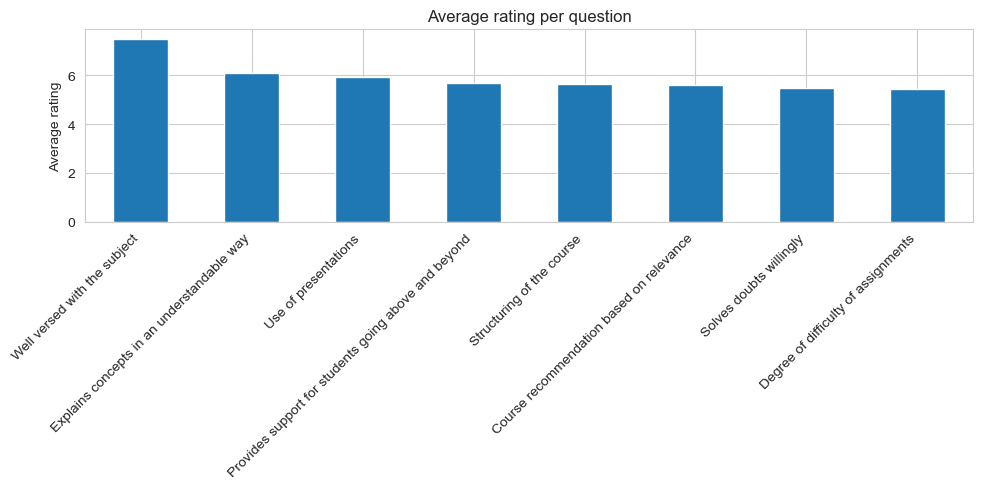

In [ ]:
plt.figure(figsize=(10,5))
question_means.plot(kind='bar')
plt.ylabel('Average rating')
plt.title('Average rating per question')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

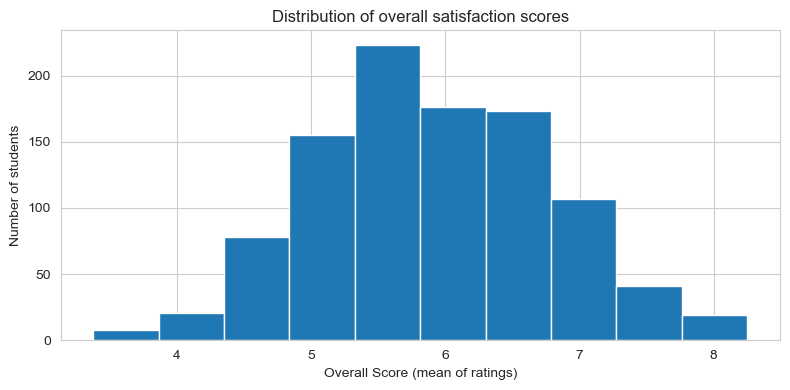

In [ ]:
plt.figure(figsize=(8,4))
plt.hist(df['Overall_Score'].dropna(), bins=10)
plt.xlabel('Overall Score (mean of ratings)')
plt.ylabel('Number of students')
plt.title('Distribution of overall satisfaction scores')
plt.tight_layout()
plt.show()

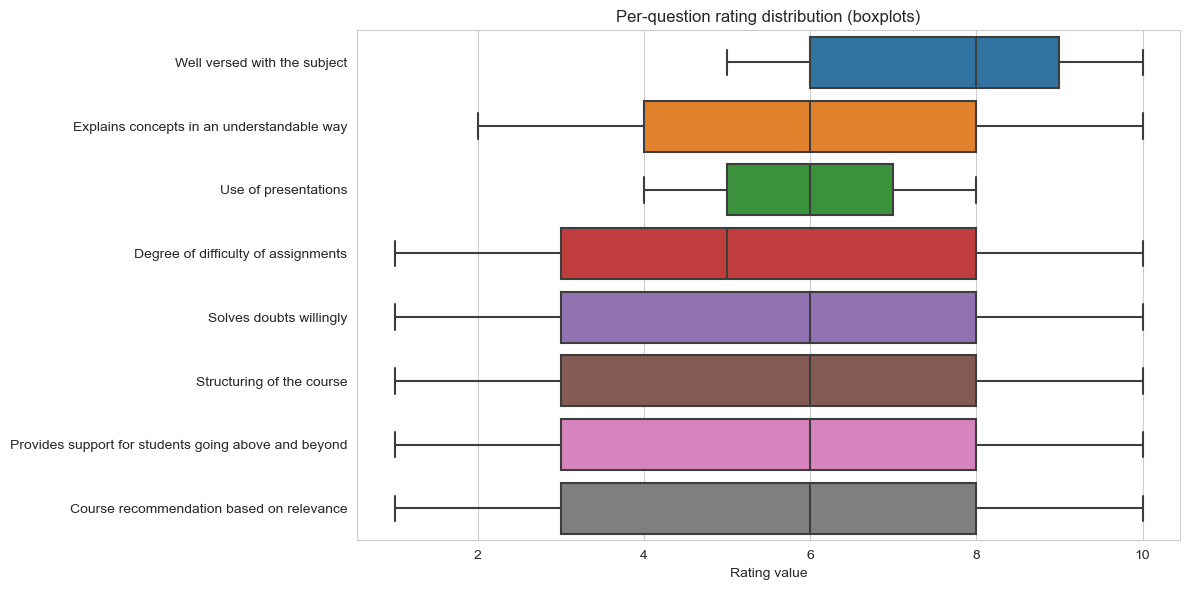

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[rating_cols], orient='h')
plt.title('Per-question rating distribution (boxplots)')
plt.xlabel('Rating value')
plt.tight_layout()
plt.show()

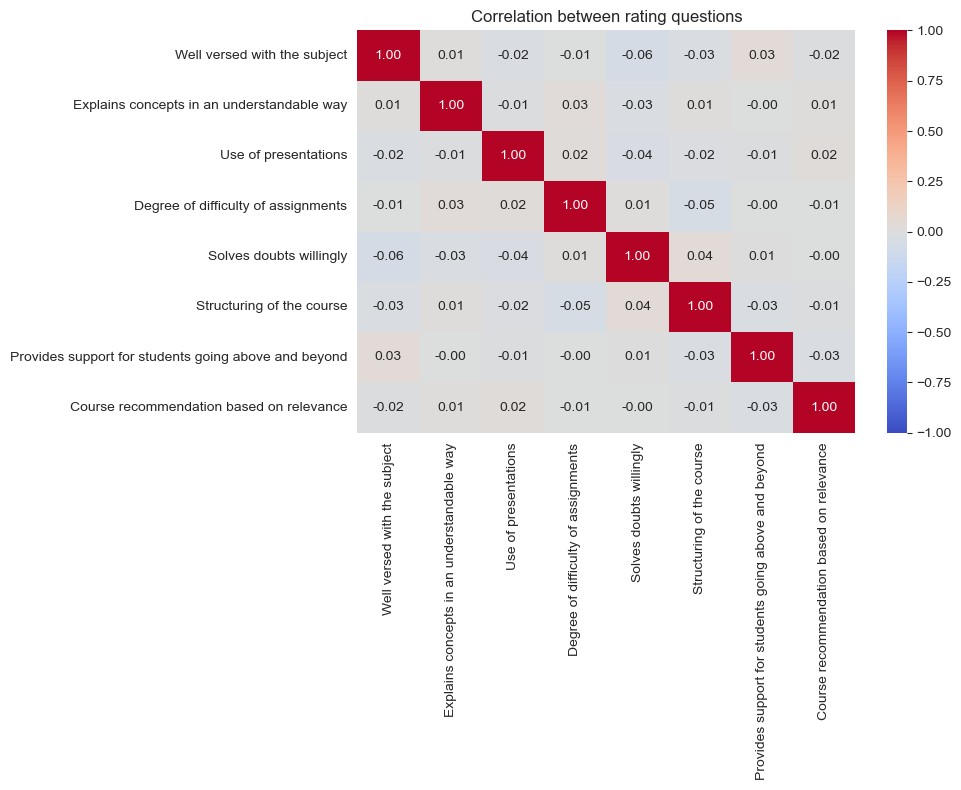

In [ ]:
plt.figure(figsize=(10,8))
corr = df[rating_cols].corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between rating questions')
plt.tight_layout()
plt.show()

In [9]:
# Add a sample 'Comments' column if it doesn't exist
if 'Comments' not in df.columns:
    sample_comments = [
        "Great teaching!", "Needs more examples.", "Very helpful.", "Assignments were tough.",
        "Loved the presentations.", "Could explain better.", "Supportive instructor.",
        "Course was well structured.", "Would recommend to others.", "Difficult assignments."
    ]
    # Repeat or trim to match the number of rows
    df['Comments'] = [sample_comments[i % len(sample_comments)] for i in range(len(df))]

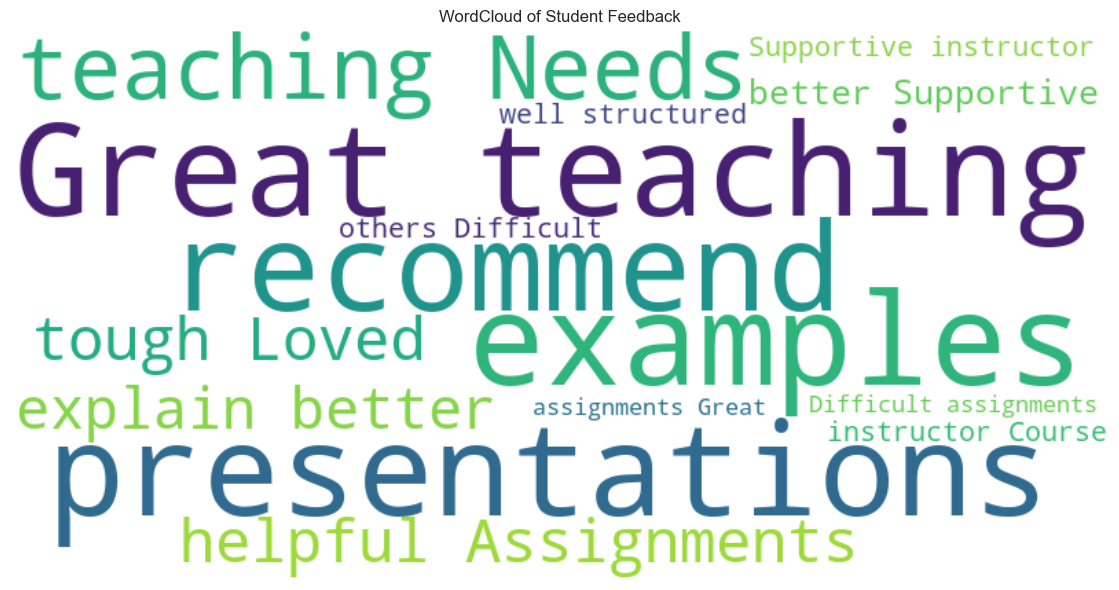

In [10]:
from wordcloud import WordCloud, STOPWORDS

# Replace 'Comments' with your actual text column name
text_col = 'Comments'

if text_col in df.columns:
    text = ' '.join(df[text_col].dropna().astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='white',
                          stopwords=STOPWORDS, colormap='viridis').generate(text)
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('WordCloud of Student Feedback')
    plt.tight_layout()
    plt.show()
else:
    print(f"Column '{text_col}' not found in DataFrame. Available columns: {df.columns.tolist()}")

In [ ]:
top3 = question_means.head(3)
bottom3 = question_means.tail(3)
display(pd.DataFrame({'Top 3': top3.index, 'Avg': top3.values}))
display(pd.DataFrame({'Bottom 3': bottom3.index, 'Avg': bottom3.values}))

,Top 3,Avg
0,Well versed with the subject,7.497502
1,Explains concepts in an understandable way,6.081918
2,Use of presentations,5.942058


,Bottom 3,Avg
0,Course recommendation based on relevance,5.598402
1,Solves doubts willingly,5.474525
2,Degree of difficulty of assignments,5.430569


In [ ]:
out_dir = '/content' if os.path.exists('/content') else '.'
df.to_csv(os.path.join(out_dir, 'student_feedback_with_overall.csv'), index=False)
question_means.to_csv(os.path.join(out_dir, 'question_means.csv'))
print('Saved: student_feedback_with_overall.csv, question_means.csv in', out_dir)

Saved: student_feedback_with_overall.csv, question_means.csv in .


In [ ]:
insights = []
insights.append(f"Top-rated areas: {', '.join(top3.index)} (avg: {', '.join([str(round(v,2)) for v in top3.values])})")
insights.append(f"Lowest-rated areas: {', '.join(bottom3.index)} (avg: {', '.join([str(round(v,2)) for v in bottom3.values])})")
insights.append("Recommendation: Investigate the lowest-rated areas and collect targeted qualitative feedback (open text) to understand root causes. Consider improving presentations/materials and clarifying assignment difficulty if those show low scores.")
for s in insights:
    print('-', s)

- Top-rated areas: Well versed with the subject, Explains concepts in an understandable way, Use of presentations (avg: 7.5, 6.08, 5.94)
- Lowest-rated areas: Course recommendation based on relevance, Solves doubts willingly, Degree of difficulty of assignments (avg: 5.6, 5.47, 5.43)
- Recommendation: Investigate the lowest-rated areas and collect targeted qualitative feedback (open text) to understand root causes. Consider improving presentations/materials and clarifying assignment difficulty if those show low scores.
